### Machine Learning Office Hours

In [7]:
import numpy as np

In [8]:
col = np.random.random(10)

### Pipelines

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [15]:
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(), LogisticRegression())

In [16]:
pipe.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
pipe.score(X, y)

0.9929701230228472

In [19]:
pipe.named_steps['polynomialfeatures'].degree

2

### Recommender System

In [20]:
import pandas as pd

In [21]:
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
#ratings.drop('timestamp', axis = 1, inplace = True)
movies.drop('genres', axis = 1, inplace = True)

In [27]:
ratings.head(1)

,userId,movieId,rating
0,1,1,4.0


In [29]:
movies.head(1)

,movieId,title
0,1,Toy Story (1995)


In [32]:
df = pd.merge(ratings, movies, on = 'movieId')

In [35]:
item_df = pd.pivot_table(df, values = 'rating', index = 'title', columns = 'userId').fillna(0)

In [36]:
item_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from scipy.sparse import csr_matrix

In [38]:
items = csr_matrix(item_df)

In [39]:
items

<9719x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [41]:
# print(items)

In [42]:
item_df.head(2)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.metrics.pairwise import pairwise_distances

In [46]:
recommender = pairwise_distances(items, metric = 'cosine')

In [47]:
recommender

array([[0.        , 1.        , 1.        , ..., 0.67267316, 1.        ,
        1.        ],
       [1.        , 0.        , 0.29289322, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.29289322, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.67267316, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ]])

In [48]:
review_df = pd.DataFrame(recommender, index = item_df.index, columns = item_df.index)

In [49]:
review_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.858347,1.0,...,1.0,0.657945,0.456695,0.292893,1.0,1.0,0.860569,0.672673,1.0,1.0
'Hellboy': The Seeds of Creation (2004),1.0,0.000000,0.292893,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Round Midnight (1986),1.0,0.292893,0.000000,1.000000,1.000000,1.0,0.823223,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Salem's Lot (2004),1.0,1.000000,1.000000,0.000000,0.142507,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0
'Til There Was You (1997),1.0,1.000000,1.000000,0.142507,0.000000,1.0,1.000000,1.0,1.000000,1.0,...,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.0


In [50]:
movies.head(2)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)


In [52]:
movies.loc[movies.title.str.contains('Die Hard')]

,movieId,title
138,165,Die Hard: With a Vengeance (1995)
793,1036,Die Hard (1988)
1053,1370,Die Hard 2 (1990)
6518,53972,Live Free or Die Hard (2007)
8103,100498,"Good Day to Die Hard, A (2013)"


In [55]:
review_df.loc['Die Hard: With a Vengeance (1995)'].sort_values()[1:10]

title
True Lies (1994)                     0.341742
Speed (1994)                         0.365913
Cliffhanger (1993)                   0.377932
Ace Ventura: Pet Detective (1994)    0.381457
GoldenEye (1995)                     0.384206
Clear and Present Danger (1994)      0.399911
Fugitive, The (1993)                 0.408297
Batman (1989)                        0.413284
Outbreak (1995)                      0.423053
Name: Die Hard: With a Vengeance (1995), dtype: float64

In [56]:
def make_recommendation(movie_name):
    return review_df.loc[movie_name].sort_values()[1:10]

In [57]:
make_recommendation('Speed (1994)')

title
True Lies (1994)                     0.327180
Jurassic Park (1993)                 0.338268
Fugitive, The (1993)                 0.351525
Die Hard: With a Vengeance (1995)    0.365913
Terminator 2: Judgment Day (1991)    0.369908
Mrs. Doubtfire (1993)                0.386574
Batman (1989)                        0.422969
Forrest Gump (1994)                  0.423840
Pretty Woman (1990)                  0.425931
Name: Speed (1994), dtype: float64

In [61]:
from surprise import SVD, Dataset

In [60]:
#!pip install surprise

In [62]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 Y


Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/jacobkoehler/.surprise_data/ml-100k


In [63]:
data

In [65]:
algo = SVD()

In [66]:
trainset = data.build_full_trainset()

In [67]:
algo.fit(trainset)

In [68]:
algo.predict(111, 200)

Prediction(uid=111, iid=200, r_ui=None, est=3.52986, details={'was_impossible': False})

In [72]:
algo.predict(122, 400)

Prediction(uid=122, iid=400, r_ui=None, est=3.52986, details={'was_impossible': False})

### Object Detection and Haar Cascades

In [111]:
import cv2 as cv

In [112]:
clf = cv.CascadeClassifier('/Users/jacobkoehler/Desktop/not_now/then/fall_18/toolkit_site/opencv/detect/haarcascade_frontalface_default.xml')

In [113]:
im = cv.imread('faces.jpeg')
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

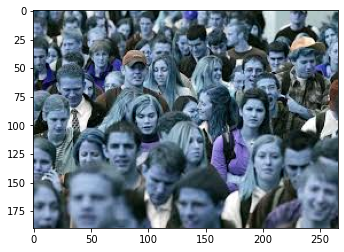

In [114]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [115]:
faces = clf.detectMultiScale(im)

In [120]:
for i in range(len(faces)):
    cv.rectangle(im, (faces[i][0], faces[i][1]), 
             (faces[i][0] +faces[i][2], faces[i][1]+faces[i][3]), 
             (0, 255, 0))

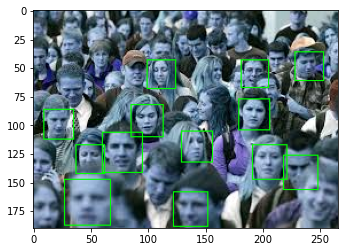

In [121]:
plt.imshow(im)

In [122]:
#cv.rectangle(im, (faces[0][0], faces[0][1]), (faces[0][0] +faces[0][2], faces[0][1]+faces[0][3]), (0, 255, 0))

In [123]:
#plt.imshow(im)

In [119]:
faces
#     for (col, row, width, height) in face:
#         cv.rectangle(im, (col, row), (width, height), (0, 255, 0), 2)

array([[  9,  86,  26,  26],
       [ 99,  43,  25,  25],
       [181,  43,  24,  24],
       [ 37, 117,  25,  25],
       [122, 158,  30,  30],
       [191, 117,  30,  30],
       [179,  77,  27,  27],
       [228,  36,  25,  25],
       [129, 105,  27,  27],
       [ 85,  82,  28,  28],
       [ 60, 106,  35,  35],
       [ 27, 147,  40,  40],
       [218, 126,  30,  30]], dtype=int32)